# Exercise 1: Band structure and Density of States of MgO

## Quantum Espresso Calculations

### Self-Consistent-Field (SCF)

Here, the ground-state electronic density of the system is computed using a self-consistent field calculation. 

**Task**: *For this first step, find the recommended cutoffs for both the wave functions (ecutwfc) and charge density (ecutrho) on the Materials Cloud SSSP efficiency website, and complete the template above to run the SCF calculation.*

- For Mg: 
    - Efficiency: wave function cutoff: 30 Ry, charge density cutoff: 240 Ry  
    - Precision: wave function cutoff: 45 Ry, charge density cutoff: 360 Ry  

- For O:  
    - Efficiency: wave function cutoff: 50 Ry, charge density cutoff: 400 Ry  
    - Precision: wave function cutoff: 75 Ry, charge density cutoff: 600 Ry  

For MgO, we select the highest cutoff values among the elements, i.e., we use the same cutoffs as for O.
- ***Results for efficiency cutoffs (50 Ry, 400 Ry): Energy = -75.53725762 Ry***
- Results for precision cutoffs (75 Ry, 600 Ry): Energy = -75.53853611 Ry

**Task**: *Test this recommendation by increasing ecutwfc and/or ecutrho. Are you convinced that the recommended values are sufficiently converged?*

Idea: Fix one of the two cutoffs at a high value and vary the other. 
1. Fixing the density cutoff at 600 Ry and varying the wave function energy cutoff
2. Fixing the wavefunction cutoff at 80 Ry and varying the density cutoff.

From the plots, the values chosen above (50 Ry, 400 Ry) seem to yield sufficiently converged values and seem to give a nice trade-off between computation expenses and accuracy.

In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
set_latex_fonts()

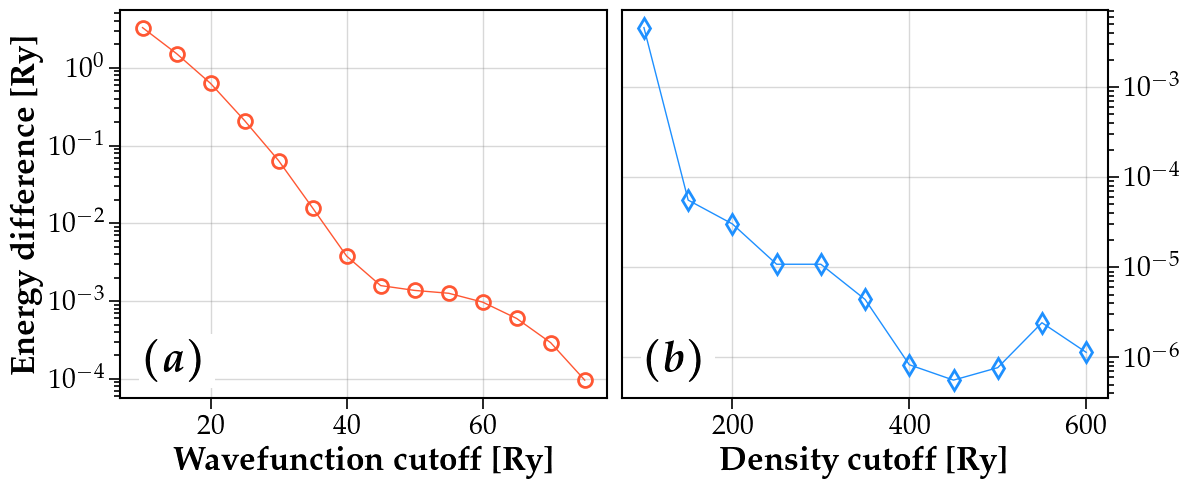

In [2]:
# Fixing the density cutoff and varying the wavefunction cutoff
Ecutrho_fixed = 600
Ecutwfc = np.array([10, 15, 20, 25, 30,
                    35, 40, 45, 50, 55, 
                    60, 65, 70, 75, 80])
E_tot1 = np.array([-72.25492204, -74.01593257, -74.90861081, -75.32892053, -75.47453071, 
                   -75.52284522, -75.53483598, -75.53704864, -75.53725958, -75.53737048,
                   -75.53766192, -75.53803462, -75.53834065, -75.53853611, -75.53863256])
E_converged_1 = E_tot1[-1]

# Fixing the wavefunction cutoff and varying the density cutoff
Ecutwfc_fixed = 80
Ecutrho = np.array([100, 150, 200, 250, 300, 350, 
                    400, 450, 500, 550, 600, 650])
E_tot2 = np.array([-75.54323302, -75.53868731, -75.53866181, -75.53862058, -75.53862058, -75.53862701,
              -75.53863059, -75.53863198, -75.53863065, -75.53863385, -75.53863256, -75.53863142])
E_converged_2 = E_tot2[-1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

# Subplot 1: Wavefunction cutoff
# axs[0].axvline(50, 0, linestyle='--', color='gray', linewidth=1)
axs[0].semilogy(Ecutwfc[:-1], np.abs(E_tot1 - E_converged_1)[:-1], 
                linestyle='-', color='#FF5733', marker='o', markerfacecolor='None',
                markersize=10, markeredgewidth=2, linewidth=1)  # Couleur orange
axs[0].set_xlabel(r'$\textbf{Wavefunction cutoff [Ry]}$', weight='bold')
axs[0].set_ylabel(r'$\textbf{Energy difference [Ry]}$', weight='bold')
axs[0].grid()

# Subplot 2: Density cutoff
# axs[1].axvline(400, 0, linestyle='--', color='gray', linewidth=1)
axs[1].semilogy(Ecutrho[:-1], np.abs(E_tot2 - E_converged_2)[:-1],
                linestyle='-', color='#1E90FF', marker='d', markerfacecolor='None',
                markersize=10, markeredgewidth=2, linewidth=1)  # Couleur bleue
axs[1].set_xlabel(r'$\textbf{Density cutoff [Ry]}$', weight='bold')
axs[1].grid()
axs[1].yaxis.tick_right()

plt.tight_layout()

# Add textboxes for (a) and (b)
axs[0].text(0.05, 0.15, r'$\boldsymbol{(a)}$', transform=axs[0].transAxes, fontsize=30,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

axs[1].text(0.05, 0.15, r'$\boldsymbol{(b)}$', transform=axs[1].transAxes, fontsize=30,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

plt.savefig("Figures/Convergence_cutoffs.pdf", bbox_inches='tight')

plt.show()

### Band structure calculation

**Task**: *Before starting the next run, you need to take note of the energy of the highest occupied level resulting from this calculation. This value can be obtained by looking at the following line in the output ”highest occupied level (ev):” by means, for example, of the grep command. We’ll use this for plotting the electronic structure later*. 

The highest occupied level is found to be ***5.3452 eV***

**Task**: *Figure out a good value to choose for nbnd, based on the number of electrons reported in the previous SCF calculation. Is this the number of electrons you would expect for this system? Consider the number of electrons of a Mg atom and an O atom, and discuss any agreement or disagreement.*

A good estimate for the number of bands is given by the number of electrons in the unit cell.

The SCF calculation reports 8 electrons in the unit cell.
- Number of Mg electrons: 12 
- Number of O electrons: 8

**comment the disagreement:**
- possible explanation: use of pseudo potentials, core electrons are not represented


**Task**: *Enter the correct symmetry points in the input file to reconstruct the (W-L-Γ-X-W-K) path. Think about how many k-points to calculate along each segment of the path. Would you assign to each segment the same number of points to have a balanced representation of the bands?*

The idea here is to set a $k$-points density per unit lenght and compute the distance between each consecutive points along the path. 
- W to L: distance = 0.7071
- L to Γ: distance = 0.8660
- Γ to X: distance = 1.0000
- X to W: distance = 0.5000
- W to K: distance = 0.3536

In [3]:
Gamma = np.array([0, 0, 0])
X = np.array([1, 0, 0])
L = np.array([0.5, 0.5, 0.5])
W = np.array([1, 0.5, 0])
K = np.array([0.75, 0.75, 0])

W_to_L = np.sqrt(np.sum((W - L)**2))
L_to_Gamma = np.sqrt(np.sum((L - Gamma)**2))
Gamma_to_X = np.sqrt(np.sum((Gamma - X)**2))
X_to_W = np.sqrt(np.sum((X - W)**2))
W_to_K = np.sqrt(np.sum((W - K)**2))

n_points = 50
print(f"Distance from W to L: {W_to_L:.4f}, Number of points: {int(W_to_L*n_points)}")
print(f"Distance from L to Gamma: {L_to_Gamma:.4f}, Number of points: {int(L_to_Gamma*n_points)}")
print(f"Distance from Gamma to X: {Gamma_to_X:.4f}, Number of points: {int(Gamma_to_X*n_points)}")
print(f"Distance from X to W: {X_to_W:.4f}", f"Number of points: {int(X_to_W*n_points)}")
print(f"Distance from W to K: {W_to_K:.4f}", f"Number of points: {int(W_to_K*n_points)}")

print(f"Total distance: {W_to_L + L_to_Gamma + Gamma_to_X + X_to_W + W_to_K:.4f}")

Distance from W to L: 0.7071, Number of points: 35
Distance from L to Gamma: 0.8660, Number of points: 43
Distance from Gamma to X: 1.0000, Number of points: 50
Distance from X to W: 0.5000 Number of points: 25
Distance from W to K: 0.3536 Number of points: 17
Total distance: 3.4267


**Task**: *A qualitative comparison should be made of the plotted bands with the analogous plot from the reference publication [see Figure 2(a) of J Comput Electron (2016) 15 1521–1530]. In particular, estimate the value of the band gap from your results and compare it with with the analogous estimate from the graph in the cited publication.*

In Table 2 of the reference paper, the computed band gap with DFT is 4.61 eV.

In [4]:
data = np.loadtxt('MgO/MgO bands/MgO-bands.dat.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

k_points = [0, 
            W_to_L, 
            W_to_L + L_to_Gamma, 
            W_to_L + L_to_Gamma + Gamma_to_X,
            W_to_L + L_to_Gamma + Gamma_to_X + X_to_W,
            W_to_L + L_to_Gamma + Gamma_to_X + X_to_W + W_to_K]

labels = ['W', 'L', r'$\Gamma$', 'X', 'W', 'K']

In [5]:
"""
fermi_level_offset = 5.3452 # Highest occupied level from SCF
num_bands_to_plot = 10      # Number of bands to plot

# --- Band Gap Calculation ---
valence_band_index = 3
conduction_band_index = 4

conduction_band_color = '#067eba' 
valence_band_color = '#a146c2'

# Find the overall Valence Band Maximum (VBM) and Conduction Band Minimum (CBM)
vbm = np.max(bands[valence_band_index, :])
cbm = np.min(bands[conduction_band_index, :])
band_gap = cbm - vbm
print(f"Overall VBM: {vbm:.4f} eV")
print(f"Overall CBM: {cbm:.4f} eV")
print(f"Overall Band gap: {band_gap:.4f} eV")

# --- Find VBM and CBM at Gamma point specifically ---
# Find the index corresponding to the Gamma point (Γ)
gamma_label_index = labels.index(r'$\Gamma$')
k_gamma_coord = k_points[gamma_label_index]
# Find the index in the k array closest to the Gamma coordinate
idx_gamma = np.argmin(np.abs(k - k_gamma_coord))
vbm_at_gamma = bands[valence_band_index, idx_gamma]
cbm_at_gamma = bands[conduction_band_index, idx_gamma]
gap_at_gamma = cbm_at_gamma - vbm_at_gamma
print(f"Valence Band Maximum at Gamma (k={k[idx_gamma]:.4f}): {vbm_at_gamma:.4f} eV")
print(f"Conduction Band Minimum at Gamma (k={k[idx_gamma]:.4f}): {cbm_at_gamma:.4f} eV")
print(f"Direct gap at Gamma: {gap_at_gamma:.4f} eV")

# --- Plotting the Band Structure ---
vbm_plot = vbm_at_gamma - fermi_level_offset
cbm_plot = cbm_at_gamma - fermi_level_offset
plt.annotate(
    '', xy=(k_gamma_coord, cbm_plot), xycoords='data',
    xytext=(k_gamma_coord, vbm_plot), textcoords='data',
    arrowprops=dict(arrowstyle='<->', color='red', lw=2)
)
plt.text(
    k_gamma_coord + 0.05, # Small offset to the right of Gamma
    (vbm_plot + cbm_plot) / 2, # Position text vertically in the middle of the gap
    f'{gap_at_gamma:.2f} eV', # Format the gap value
    color='red',
    verticalalignment='center',
    fontsize=20
)

for band in range(len(bands)):
    if band < num_bands_to_plot:
        plt.plot(k, bands[band, :] - fermi_level_offset,
                    linewidth=1.5,
                    alpha=0.8,
                    color=valence_band_color if band <= valence_band_index else conduction_band_color)
# plt.axhline(y=0, color='k', linestyle='--', linewidth=1.5, alpha=0.5, label='Fermi level')
plt.xlabel(r"$\vec k$-path")
plt.xticks(k_points, labels)
plt.xlim(0, k_points[-1])
plt.ylabel(r"$E-E_{\rm F}$ [eV]")
plt.grid(axis='x', linestyle='-', linewidth=1, alpha=0.7, color='k')
plt.grid(axis='y', linestyle='')
plt.ylim(-5, 15)        
plt.tight_layout()
plt.show()
"""

'\nfermi_level_offset = 5.3452 # Highest occupied level from SCF\nnum_bands_to_plot = 10      # Number of bands to plot\n\n# --- Band Gap Calculation ---\nvalence_band_index = 3\nconduction_band_index = 4\n\nconduction_band_color = \'#067eba\' \nvalence_band_color = \'#a146c2\'\n\n# Find the overall Valence Band Maximum (VBM) and Conduction Band Minimum (CBM)\nvbm = np.max(bands[valence_band_index, :])\ncbm = np.min(bands[conduction_band_index, :])\nband_gap = cbm - vbm\nprint(f"Overall VBM: {vbm:.4f} eV")\nprint(f"Overall CBM: {cbm:.4f} eV")\nprint(f"Overall Band gap: {band_gap:.4f} eV")\n\n# --- Find VBM and CBM at Gamma point specifically ---\n# Find the index corresponding to the Gamma point (Γ)\ngamma_label_index = labels.index(r\'$\\Gamma$\')\nk_gamma_coord = k_points[gamma_label_index]\n# Find the index in the k array closest to the Gamma coordinate\nidx_gamma = np.argmin(np.abs(k - k_gamma_coord))\nvbm_at_gamma = bands[valence_band_index, idx_gamma]\ncbm_at_gamma = bands[conduc

**Task**: *The experimentally measured band gap of MgO is 7.90 eV at zero temperature. Comment about possible discrepancies with experiment, and the quality of the DFT functional used in the current exercise.*

- DFT severely underestimates the band gap due to the approximate treatment of exchange-correlation effects

**Task**: *Does your result suggest that this material should appear colorless?*

The smallest possible electron excitation occurs at the $\Gamma$ point, where the band gap is $4.44$ eV. This energy corresponds to a photon wavelength of approximately $279$ nm, which lies in the ultraviolet (UV) region and is not visible to the human eye. Therefore, MgO does not absorb visible light and should appear colorless or transparent in the visible spectrum.

In [6]:
eV = 1.602176634e-19
h = 6.62607015e-34
c = 299792458
band_gap = 4.44
wavelength = h*c / (band_gap * eV) * 1e9 # Convert to nm
print(f"Band gap wavelength: {wavelength:.2f} nm")

Band gap wavelength: 279.24 nm


### Density of States

**Task**: *Use your favorite tool for plotting data in order to get a graphical representation of the function $D(E)$. Compare the obtained DOS with the band structure. Is everything as you would expect? Comment on the salient features of the DOS, especially close to the band extrema.*

In [23]:
from IPython.display import display, HTML

fermi_level_offset = 5.3452 # Highest occupied level from SCF
num_bands_to_plot = 8     # Number of bands to plot

# Load the DoS data
data = np.loadtxt('MgO/MgO DOS/MgO-dos.dat', skiprows=1)  
energy = data[:, 0]    # First column: Energy (eV)
dos = data[:, 1]       # Second column: DOS(E)
int_dos = data[:, 2]   # Third column: Integrated DOS(E)

# Extract Fermi energy from the header
with open('MgO/MgO DOS/MgO-dos.dat', 'r') as f:
    header = f.readline()
    fermi_energy = float(header.split('EFermi =')[1].split('eV')[0])
display(HTML(f"<b>Fermi Energy: {fermi_energy:.2f} eV</b>"))

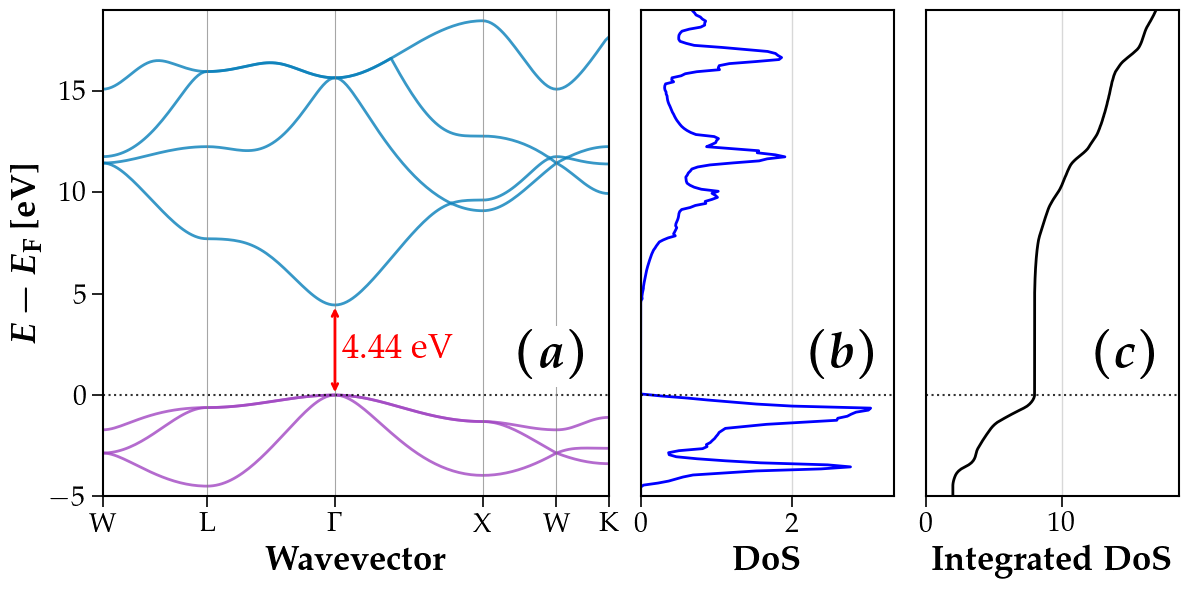

In [48]:
fermi_level_plot = fermi_energy - fermi_level_offset

fig, axs = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1, 1]})
valence_band_index = 3
conduction_band_index = 4
conduction_band_color = '#067eba' 
valence_band_color = '#a146c2'
# --- Plot Band Structure ---
ax_bands = axs[0]
for band_idx in range(len(bands)):
    if band_idx < num_bands_to_plot:
        ax_bands.plot(k, bands[band_idx, :] - fermi_level_offset, 
                      linewidth=2,
                      alpha=0.8,
                      color=valence_band_color if band_idx <= valence_band_index else conduction_band_color)
        
ax_bands.axhline(y=0, color='k', linestyle=':', linewidth=1.5, label='Fermi level', alpha=0.8)

# After creating the band structure plot in ax_bands
# Add band gap annotation at the Gamma point
gamma_label_index = labels.index(r'$\Gamma$')
k_gamma_coord = k_points[gamma_label_index]

# Find the index in the k array closest to the Gamma coordinate
idx_gamma = np.argmin(np.abs(k - k_gamma_coord))
vbm_at_gamma = bands[valence_band_index, idx_gamma]
cbm_at_gamma = bands[conduction_band_index, idx_gamma]
gap_at_gamma = cbm_at_gamma - vbm_at_gamma

# Calculate the shifted values for plotting
vbm_plot = vbm_at_gamma - fermi_level_offset
cbm_plot = cbm_at_gamma - fermi_level_offset

# Add the annotation arrow
ax_bands.annotate(
    '', xy=(k_gamma_coord, cbm_plot), xycoords='data',
    xytext=(k_gamma_coord, vbm_plot), textcoords='data',
    arrowprops=dict(arrowstyle='<->', color='red', lw=2)
)

# Add the text label for the band gap value
ax_bands.text(
    k_gamma_coord + 0.05,  # Small offset to the right of Gamma
    (vbm_plot + cbm_plot) / 2,  # Position text vertically in the middle of the gap
    f'{gap_at_gamma:.2f} eV',  # Format the gap value
    color='red',
    verticalalignment='center',
    fontsize=25  # Adjusted font size for the combined plot
)

ax_bands.set_xlabel(r"$\textbf{Wavevector}$", fontsize=25)
ax_bands.set_xticks(k_points)
ax_bands.set_xticklabels(labels)
ax_bands.set_xlim(k_points[0], k_points[-1])
ax_bands.set_ylabel(r"$\boldsymbol{E - E_{\rm F}}\textbf{ [eV]}$", fontsize=25)
# ax_bands.legend()

for k_val in k_points[1:-1]:
    ax_bands.axvline(x=k_val, linestyle='-', linewidth=0.8, alpha=0.7, color='gray')


# --- Plot Density of States ---
ax_dos = axs[1]
dos_energy_shifted = energy - fermi_level_offset # 'energy' here is raw DOS energy
ax_dos.plot(dos, dos_energy_shifted, 'b-', linewidth=2, label='Total DOS') # 'dos' here is DOS values
ax_dos.axhline(y=0, color='k', linestyle=':', linewidth=1.5, alpha=0.8)
ax_dos.set_xlabel(r"$\textbf{DoS}$", fontsize=25)
ax_dos.set_yticks([])
ax_dos.grid()

# --- Plot Integrated Density of States  ---
ax_int_dos = axs[2]
# 'int_dos' here is integrated DOS values, 'energy' is raw DOS energy
ax_int_dos.plot(int_dos, dos_energy_shifted, 'k-', linewidth=2, label='Integrated DOS')
ax_int_dos.axhline(y=0, color='k', linestyle=':', linewidth=1.5, alpha=0.8)
ax_int_dos.set_xlabel(r"$\textbf{Integrated DoS}$", fontsize=25)
ax_int_dos.set_yticks([])
ax_int_dos.grid()

common_ylim = (-5, 19) 
ax_bands.set_ylim(common_ylim)
ax_dos.set_ylim(common_ylim)
ax_int_dos.set_ylim(common_ylim)

# Set DOS x-axis limits
ax_dos.set_xlim(0, np.max(dos[ (dos_energy_shifted > common_ylim[0]) & (dos_energy_shifted < common_ylim[1]) ]) * 1.1 if np.any(dos[ (dos_energy_shifted > common_ylim[0]) & (dos_energy_shifted < common_ylim[1]) ]) else 1)

# Set Integrated DOS x-axis limits
ax_int_dos.set_xlim(0, np.max(int_dos[ (dos_energy_shifted > common_ylim[0]) & (dos_energy_shifted < common_ylim[1]) ]) * 1.1 if np.any(int_dos[ (dos_energy_shifted > common_ylim[0]) & (dos_energy_shifted < common_ylim[1]) ]) else 10)



# add textboxes for (a), (b), and (c)
ax_bands.text(0.82, 0.34, r'$\boldsymbol{(a)}$', transform=ax_bands.transAxes, fontsize=35,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

ax_dos.text(0.67, 0.34, r'$\boldsymbol{(b)}$', transform=ax_dos.transAxes, fontsize=35,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

ax_int_dos.text(0.67, 0.34, r'$\boldsymbol{(c)}$', transform=ax_int_dos.transAxes, fontsize=35,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=1, edgecolor='None'))
plt.tight_layout()

#plt.savefig("Figures/MgO_bands_dos_int-dos.pdf", bbox_inches='tight')

plt.show()

**Task**: *Plot the results for the PDOS of the s and p orbitals of the Mg and O atoms near the valence band maximum. Can you reconcile the results from the (P)DOS with the electronic configuration given to the Mg and O atoms in the periodic table, and the familiar notion of ionic bond?*

- The obtained figure nicely ressembles results from Kohiki et al.(Energy Loss Structure of X-ray Photoelectron Spectra of MgO and $\alpha$-Al2O3) see Figure 2.
- The valence band is really similar to that in King et al. (Valence-band electronic structure of CdO, ZnO, and MgO from x-ray photoemission
spectroscopy and quasi-particle-corrected density-functional theory calculations) see Figure 3. 

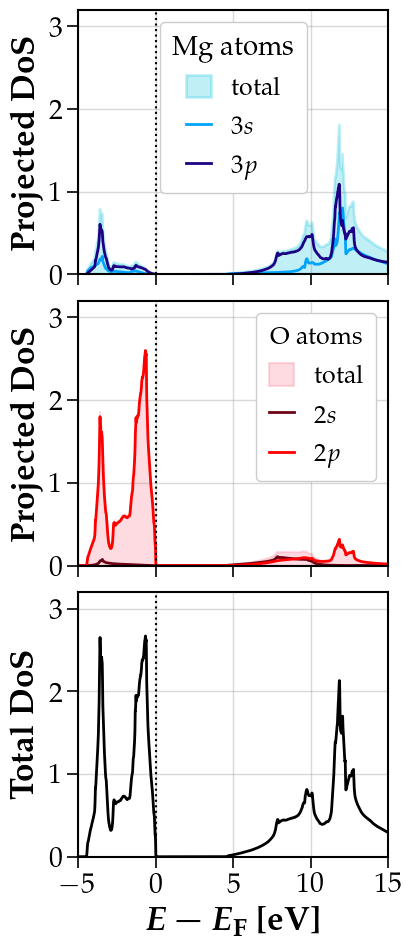

In [44]:
file_paths = {
    'Mg_tot': 'MgO/MgO PDOS/atom_Mg_tot.dat',
    'Mg_s': 'MgO/MgO PDOS/atom_Mg_s.dat',
    'Mg_p': 'MgO/MgO PDOS/atom_Mg_p.dat',
    'O_tot': 'MgO/MgO PDOS/atom_O_tot.dat',
    'O_s': 'MgO/MgO PDOS/atom_O_s.dat',
    'O_p': 'MgO/MgO PDOS/atom_O_p.dat'
}

pdos_data = {}
for key, path in file_paths.items():
    data = np.loadtxt(path, skiprows=1)
    pdos_data[key] = {
        'energy': data[:, 0] - fermi_level_offset,  # Shift energy by fermi energy found in NSCF
        'pdos': data[:, 1]
    }

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 11), sharey=True)

xmin = -5
xmax = 15

# Plot Mg PDOS on top panel
ax1.fill_between(pdos_data['Mg_tot']['energy'], pdos_data['Mg_tot']['pdos'], '-', label='total', alpha=0.25, linewidth=2, color='#04c1de')
ax1.plot(pdos_data['Mg_s']['energy'], pdos_data['Mg_s']['pdos'], '-', label=r'$3s$', color='#02a3fa', linewidth=2)
ax1.plot(pdos_data['Mg_p']['energy'], pdos_data['Mg_p']['pdos'], '-', label=r'$3p$', color='#1c0185', linewidth=2)
ax1.set_ylabel(r'$\textbf{Projected DoS}$')
ax1.grid(True, axis='both')
ax1.axvline(0, color='k', linestyle=':')
ax1.legend(title='Mg atoms', title_fontsize=20, fontsize=18)
ax1.set_xlim(xmin, xmax)
ax1.set_xticks([-5,0,5,10,15]) 
ax1.set_xticklabels([])

# Plot O PDOS on the middle panel
ax2.fill_between(pdos_data['O_tot']['energy'], pdos_data['O_tot']['pdos'], '-', label='total', linewidth=1.5, color='#fa7389', alpha=0.25)
ax2.plot(pdos_data['O_s']['energy'], pdos_data['O_s']['pdos'], '-', label=r'$2s$', linewidth=2, color='#6e0214')
ax2.plot(pdos_data['O_p']['energy'], pdos_data['O_p']['pdos'], '-', label=r'$2p$', linewidth=2, color='red')
ax2.set_ylabel(r'$\textbf{Projected DoS}$')
ax2.grid(True, axis='both')
ax2.legend(title='O atoms', title_fontsize=18, fontsize=18)
ax2.axvline(0, color='k', linestyle=':')
ax2.set_xlim(xmin, xmax)
ax2.set_xticks([-5,0,5,10,15])
ax2.set_xticklabels([])

# Plot the total DOS on the bottom panel
total_dos = pdos_data['Mg_tot']['pdos'] + pdos_data['O_tot']['pdos']
ax3.plot(pdos_data['Mg_tot']['energy'], total_dos, 'k-', linewidth=2)
ax3.set_xlabel(r'$\boldsymbol{E - E_{\rm F}} \textbf{ [eV]}$')
ax3.set_ylabel(r'$\textbf{Total DoS}$')
ax3.grid(True, axis='both')
ax3.axvline(0, color='k', linestyle=':')
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(0, 3.2)
ax3.set_yticks([0,1,2,3])
ax3.set_xticks([-5,0,5,10,15])
ax3.set_yticklabels([0,1,2,3])

plt.subplots_adjust(hspace=0.1)

plt.savefig("Figures/MgO_pdos.pdf", bbox_inches='tight')

plt.show()